### Exploration of the strong AudioSet

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
path_train = "/disk2/data/fernandol/data/Strong_Audioset/metadata/audioset_train_strong.tsv"
path_labels = "/disk2/data/fernandol/data/Strong_Audioset/metadata/mid_to_display_name.tsv"

In [24]:
df = pd.read_csv(path_train, sep="\t")
label_df = pd.read_csv(path_labels, sep="\t")

# add a header to label_df
label_df.columns = ["label", "label_name"]

print(df.head())

          segment_id  start_time_seconds  end_time_seconds       label
0  b0RFKhbpFJA_30000               0.000            10.000  /m/03m9d0z
1  b0RFKhbpFJA_30000               4.753             5.720   /m/05zppz
2  b0RFKhbpFJA_30000               0.000            10.000  /m/07pjwq1
3  b0RFKhbpFJA_30000               6.899             7.010  /m/07qjznt
4  b0RFKhbpFJA_30000               8.534             9.156  /t/dd00092


In [25]:
# Count the number of each label
# grouping by the label column and counting the number of instances of each label 
# order the results by the number of instances in descending order
labels = df.groupby("label").size().reset_index(name="counts").sort_values("counts", ascending=False)

# Join this by label to the labels dataframe to get the human-readable names, and the counts
labels = labels.join(label_df.set_index("label"), on="label")

print(labels.head(30))



          label  counts                               label_name
423  /t/dd00099  131725                    Generic impact sounds
163   /m/05zppz  101509                Male speech, man speaking
253  /m/07qjznt   57020                                     Tick
106    /m/02zsn   36065            Female speech, woman speaking
399    /m/0lyf6   31606                                Breathing
147    /m/04rlf   30930                                    Music
419  /t/dd00077   27411                               Mechanisms
328   /m/093_4n   21162                         Background noise
422  /t/dd00092   18834                  Wind noise (microphone)
63    /m/020bb7   16732  Bird vocalization, bird call, bird song
338    /m/09l8g   16211                              Human voice
425  /t/dd00109   15918                          Surface contact
351    /m/0c1dj   14803                             Sound effect
201  /m/07pbtc8   12699                          Walk, footsteps
39    /m/01j3sz   11706  

/tmp/ipykernel_420917/2418915320.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.barh(labels["label_name"][:30], labels["counts"][:30])


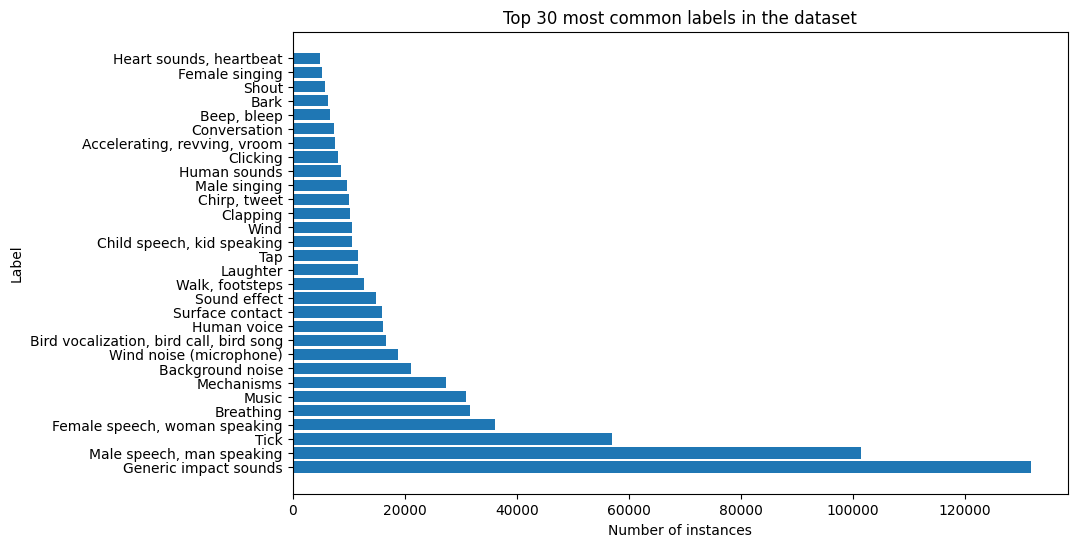

In [26]:
# Plot a ranking of the most common labels
plt.figure(figsize=(10, 6))
plt.barh(labels["label_name"][:30], labels["counts"][:30])
plt.xlabel("Number of instances")
plt.ylabel("Label")
plt.title("Top 30 most common labels in the dataset")
plt.show()


In [31]:
# Get the labels
 
label_names = ["Speech", "Male speech, man speaking","Female speech, woman speaking","Child speech, kid speaking",\
               "Police car (siren)","Ambulance (siren)","Fire engine, fire truck (siren)","Siren","Civil defense siren",\
                "Explosion","Cough","Dog","Canidae, wild dogs, wolves","Fire alarm","Slap, smack","Breaking","Smash, crash","Fire"]


interesting_labels = labels[labels["label_name"].isin(label_names)]

print(interesting_labels)


          label  counts                       label_name
163   /m/05zppz  101509        Male speech, man speaking
106    /m/02zsn   36065    Female speech, woman speaking
402    /m/0ytgt   10679       Child speech, kid speaking
340    /m/09x0r    4501                           Speech
348   /m/0bt9lr    3819                              Dog
24    /m/01b_21    2116                            Cough
9     /m/014zdl    1145                        Explosion
354   /m/0c3f7m     999                       Fire alarm
120   /m/03kmc9     822                            Siren
302  /m/07ryjzk     673                      Slap, smack
79     /m/02_41     601                             Fire
5     /m/012ndj     480  Fire engine, fire truck (siren)
203  /m/07pc8lb     435                         Breaking
146   /m/04qvtq     354               Police car (siren)
361    /m/0dgbq     249              Civil defense siren
4     /m/012n7d     224                Ambulance (siren)
210  /m/07pjjrj     144        